# Linear regression and other simple python problems

In [14]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set()

In [15]:
data = pd.read_csv('/home/home02/earshar/data_science/main/data/csv_datasets/simple_linear_regression.csv')

In [16]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Create your first regression

In [17]:
y = data['GPA']
x1 = data['SAT']

### Explore the data

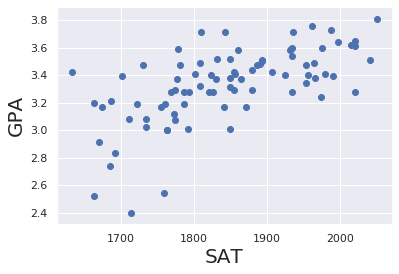

In [18]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

### Regression itself

- First, estimate the intercept (`x0`) using the `add_constant` method
- `results` will contain the output of the Ordinary Least Squares (OLS) regression
- `fit ` will apply a specific estimation technique (OLS here) to obtain the fit of the model
- `results.summary` will summarise your results
- Most of the useful statistics are found in the second table. The coefficient and slope are represented by `const` (0.2750) and `SAT` (0.0017), respectively. The p-value of 0.000 for `SAT` indicates that SAT is a significant variable when predicting GPA. The p-value of 0.503 for `const` indicates that the coefficient is most likely different from zero (variable is not significant). This part is not too important, given that we're not really fussed whether or not the regression line passes through the intercept. 

In [19]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           7.20e-11
Time:                        16:27:35   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Replot the data and overlay the regression line

- Line which is closest to all point simultaneously

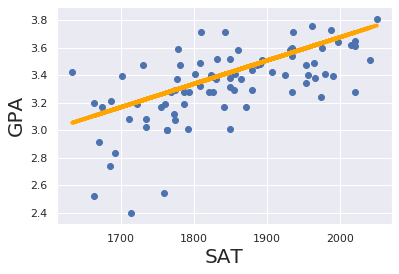

In [20]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()